# Step 0: Import the relevent libraries & Database

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
print('Libraries imported')

Libraries imported


In [3]:
# Create our dataframe
df = pd.read_csv('coaster_db.csv')

# Step 1: Data Understanding.
- Dataframe shape 
- head & tail 
- dtypes
- describe

In [4]:
# Here we can see the head of the dataset, in the first input in this notebook, we set pd.set_option('display.max_columns', 200).
# The purpose of this is so we can see every column in the dataset, as pandas by default will cut half of this away.
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
# This shape will tell us how many rows & columns the dataset has,
# In this case we have 1087 rows and 56 columns
df.shape

(1087, 56)

In [7]:
# Sometimes its easier to run .columns on the dataframe, as this will show all the columns as a list, 
# which may be easier to read instead of being blinded by data like above.
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [8]:
# In every pandas dataframe, every column is a series, and every pandas series has a type
# objects are a string type columns, some are float values
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [9]:
# the .describe() function will show us some information & statistics about the numeric data in the dataset
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preperation & Data Cleaning
- Dropping irrelevant columns & rows
- Identifying duplicated columns
- Renaming columns 
- Feature Creation

### But we can also drop columns with the .drop() function, with axis=1 this then tells pandas to drop a column, not a row
- df.drop(['Opening date'], axis=1)

In [12]:
# Here we are just commenting out alot of the data we dont need & creating a subset of data

df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    # 'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 
    #'Opened', 
    #'Replaced by', 'Website',
    #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 
    'latitude', 'longitude', 
    'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy() # Brand new dataframe

In [13]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_value          float64
height_unit            object
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [14]:
# We can now assign the column to the conversion of the dtype to the column, and then check it again

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

# We can do something similar with another column, try and force it to be a numeric if it was a string, 
# however this is not nessacery here
# pd.to_numeric(df['year_introduced'])

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_value                 float64
height_unit                   object
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [15]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_value', 'height_unit', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [16]:
# Renaming columns, here we just df.rename, select that its columns we wish to change,
# and then just provide it with our changes in the form of a dictionary.
df = df.rename(columns ={'coaster_name':'Coaster_Name',
                                    'year_introduced': 'Year_Introduced',
                                    'latitude': 'Latitude',
                                    'longitude': 'Longitude',
                                    'opening_date_clean': 'Opening_Date',
                                    'speed_mph': 'Speed_MPH',
                                    'height_value': 'Height_Value',
                                    'height_unit': 'Height_Unit',
                                    'height_ft': 'Height_ft',
                                    'Inversions_clean': 'Inversions',
                                    'Gforce_clean': 'Gforce'})

df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_MPH',
       'Height_Value', 'Height_Unit', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [17]:
# We can check how many null values there are with the .sum() which will
# sum all the null values and present it.
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_MPH          150
Height_Value       122
Height_Unit        122
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [18]:
# duplicated by default will give us all rows which are duplicated, apart from the 1st row.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [19]:
# We can also run a .loc to see them, which there arent any
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Value,Height_Unit,Height_ft,Inversions,Gforce


In [21]:
# However when run on a single subset, we can see there are actual duplicates, so we can
# Investigate this further by running a .loc[] on the subset method
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Value,Height_Unit,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,ft,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,77.0,ft,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,104.0,ft,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,10.0,m,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,13.0,ft,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,206.0,ft,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,111.0,ft,NaN,3,4.7


In [22]:
# Checking a duplicate, by running a query on the first duplicate we have found,
# The only difference is the opening date, so we will assume this is a mistake
# in the data set.
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_Value,Height_Unit,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,ft,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,ft,NaN,0,4.0


In [23]:
# Here we run a .sum() on the subset of duplicates to find 97 of them in total
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [25]:
# We can also look at the inverse of the subset duplicates with the tilda (~)
~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [29]:
# We can now subset these duplicated columns, however when we do this, we are also dropping rows, 
# which can mess with our indexes, so its a good idea to reset these with .reset_index
df =df.loc[ ~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()

In [30]:
df.shape

(990, 15)

# Step 3: Feature Understanding

(Univariate analysis)
- Plotting Feature Distributions
    - Histogram
    - KDE
    -Boxplot

In [32]:
# value_counts() counts how many unique values occur, will automatically
# order from most to least occuring.
df['Year_Introduced'].value_counts()

# Below we can see that there were 46 rollercoasters added in 1999

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

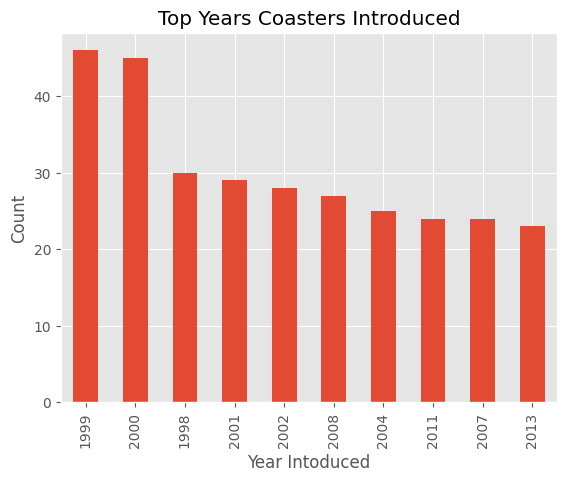

In [44]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Years Coasters Introduced')
ax.set_xlabel('Year Intoduced')
ax.set_ylabel('Count')

# Here we are plotting the first 10 counts of rollercoasters
# Introduced, we are plotting a bar chart and giving it a title
# We can then save all of this as a matplotlib ax and then
# with the ax, set the y label and x label

Text(0.5, 0, 'speed mph')

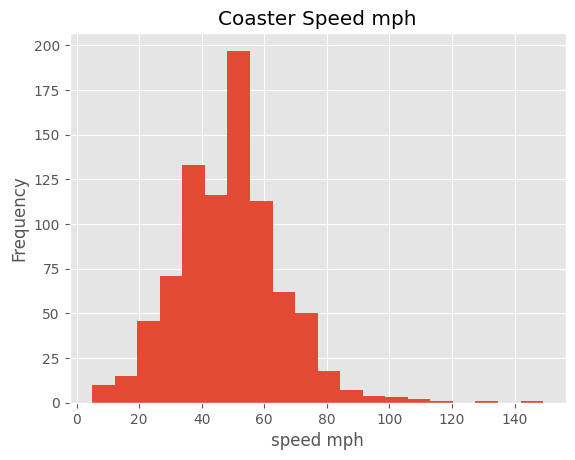

In [56]:
# Here we can look at the speed of the rollercoaster
# and adjust the bins to zoom out on the plot
ax = df['Speed_MPH'].plot(kind='hist', 
                          bins=20, 
                          title='Coaster Speed mph')
ax.set_xlabel('speed mph')

Text(0.5, 0, 'speed mph')

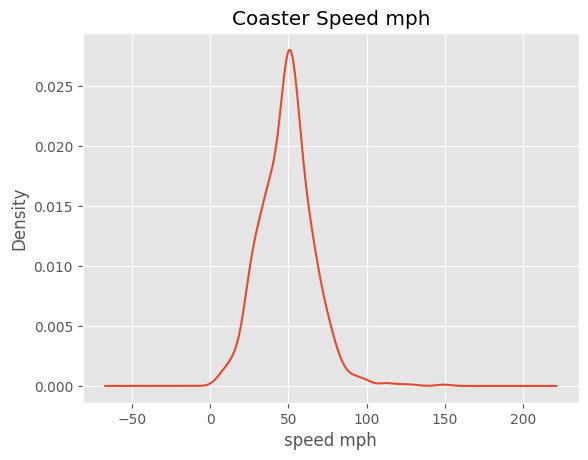

In [63]:
# Looking at the same set of data, but using a kde plot
ax = df['Speed_MPH'].plot(kind='kde', 
                          title='Coaster Speed mph')
ax.set_xlabel('speed mph')


# In statistics, kernel density estimation (KDE) 
# is the application of kernel smoothing for probability density estimation

# Step 4: Feature Relationships
- Scatterpolot
- Heatmatp Correlation
- Pairplot
- Groupby comparisons

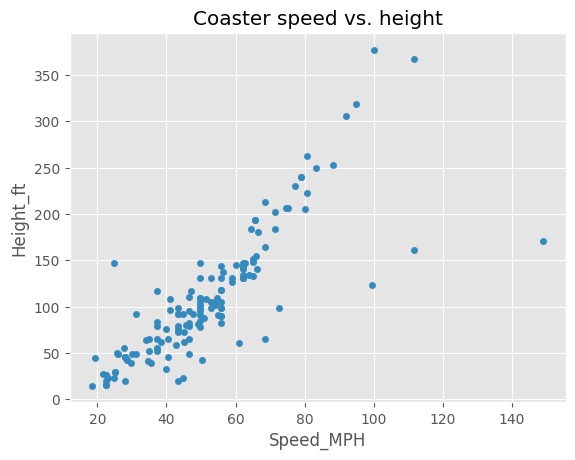

In [64]:
# This is creating a matplotlib object when we run this
# in pandas, so we can use the plt.show() at the end
# to remove the object details, to make it look cleaner
df.plot(kind='scatter', x='Speed_MPH', y='Height_ft', 
       title = 'Coaster speed vs. height')
plt.show()

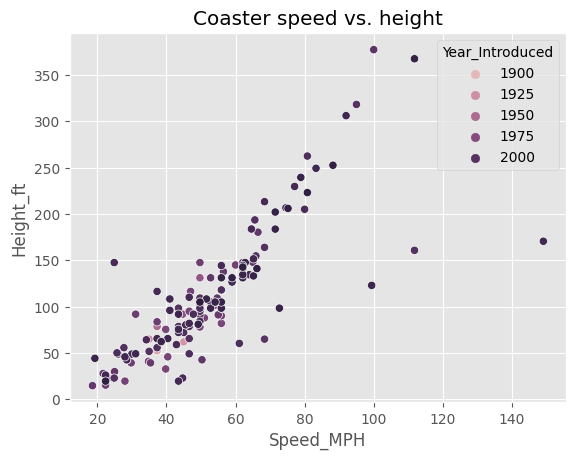

In [72]:
# Here we can compare seaborn plots to matplotlib,
# and out of the box we can use fancy features such
# as hue to show our data points as different colours
ax = sns.scatterplot(x='Speed_MPH', 
                y='Height_ft',
                hue='Year_Introduced',
               data=df)
ax.set_title('Coaster speed vs. height')
plt.show()

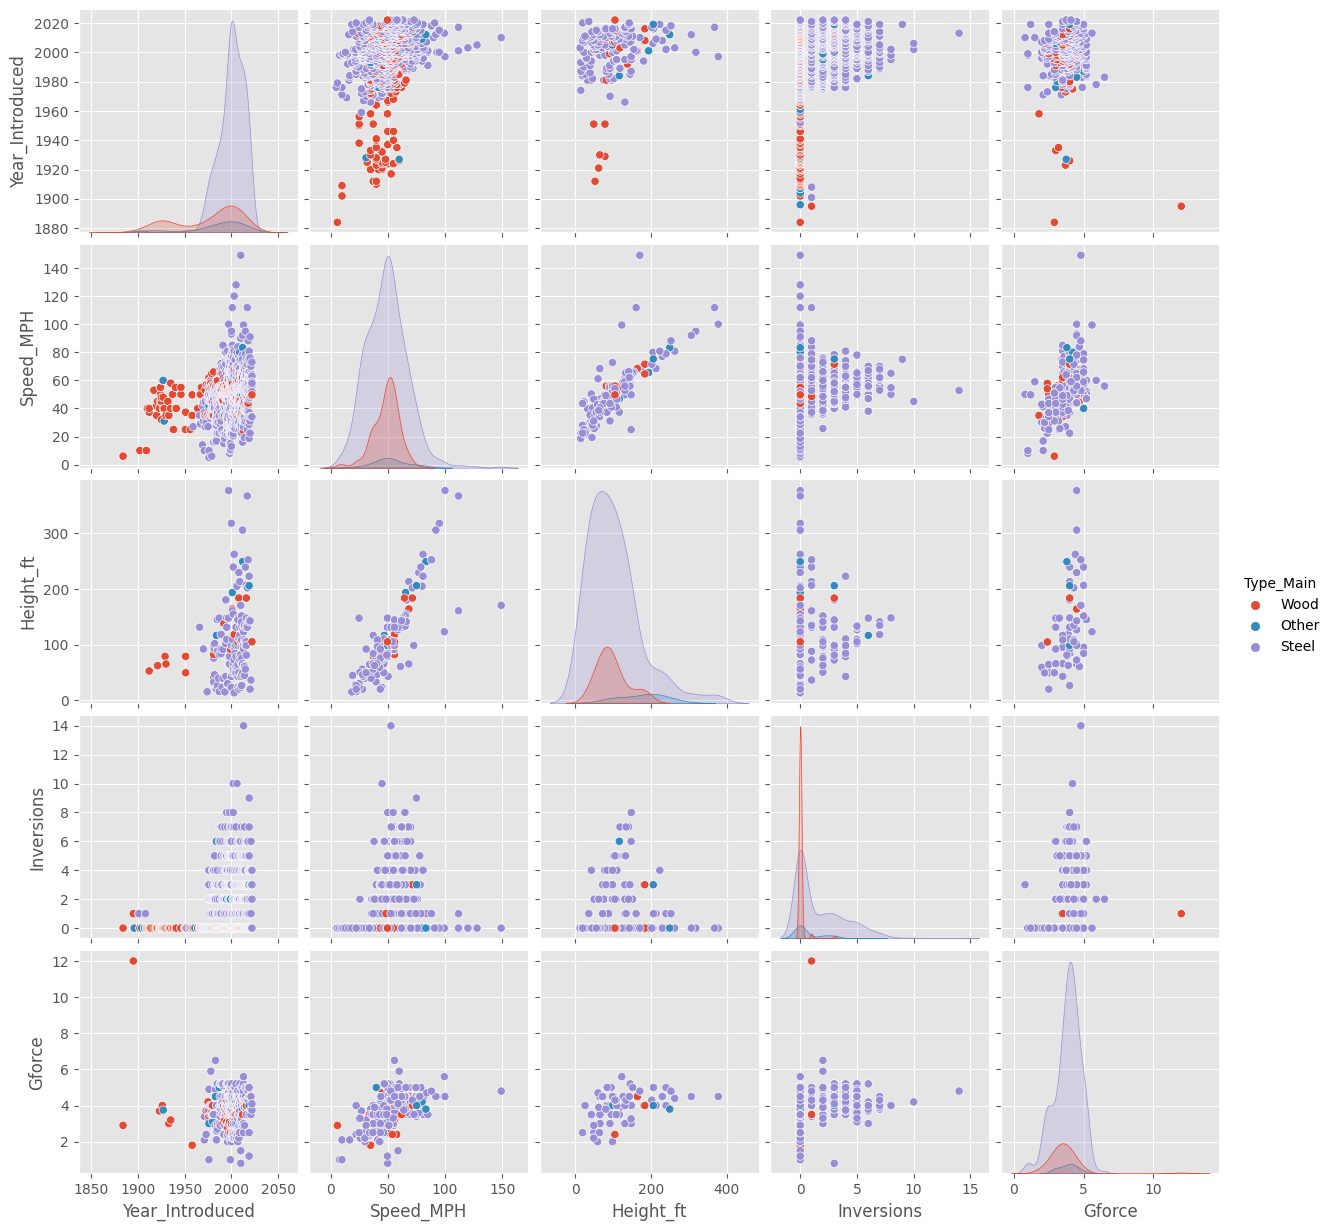

In [76]:
# Pair Plot helps us to visualize the distribution of single 
# variables in matrix form, as well as relationships between two variables. 
# They are a great method to identify trends between variables for follow-up analysis

sns.pairplot(df, vars=['Year_Introduced', 'Speed_MPH', 
                      'Height_ft', 'Inversions', 'Gforce'],
            hue='Type_Main')
plt.show()

In [81]:
# We can take a look at the corrolation between each of the
#values which we know are numerical
df_corr = df[['Year_Introduced', 'Speed_MPH', 
    'Height_ft', 'Inversions', 'Gforce']].dropna().corr()

# Here we can see year introduced doesn't really have anything
# meaningful in terms of corrolation

<Axes: >

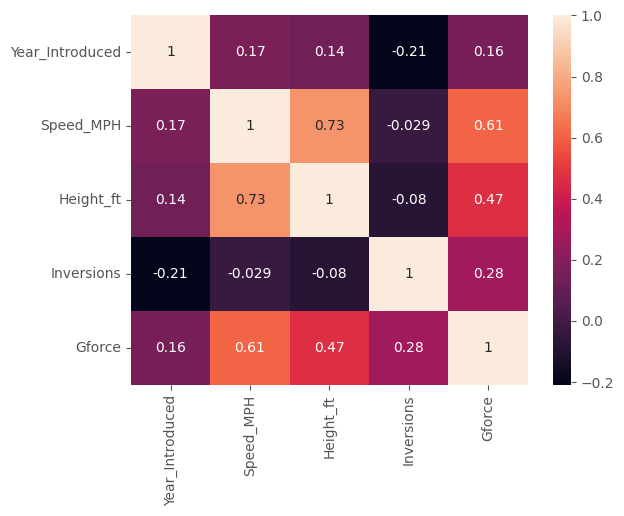

In [83]:
# Here we can see how the values corrolate to each other in a heatmap
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic

Question: What are the locations with the fastest roller coasters, with a minimum
of 10 coasters at that location?

In [95]:
df['Location'].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

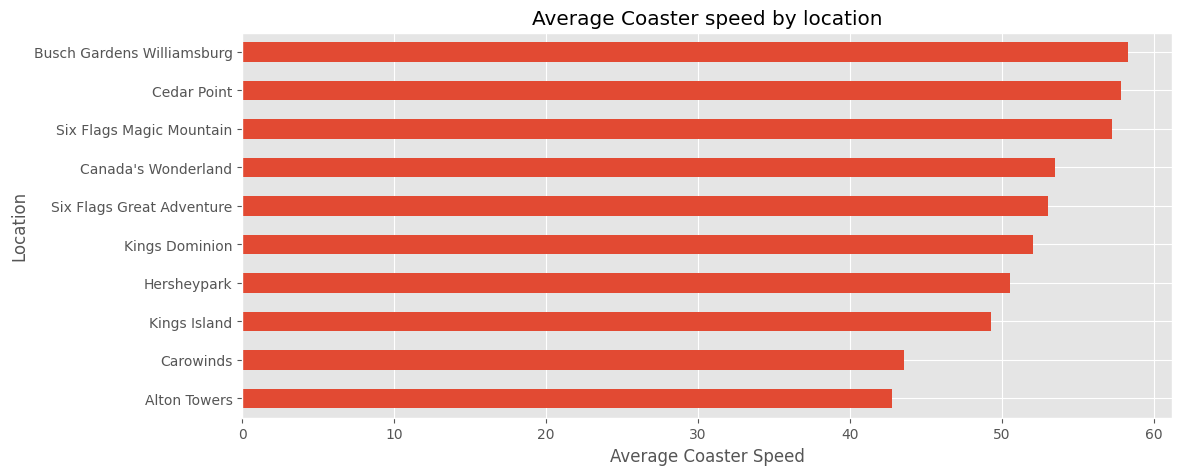

In [110]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_MPH'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coaster speed by location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

# Here we can see the answer to our quester is Buch Gardens Williamsburg